In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation, Input
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
print(f"X_train.shape : {X_train.shape}\ny_train.shape : {y_train.shape}\nX_test.shape : {X_test.shape}\ny_test.shape : {y_test.shape}")

X_train.shape : (50000, 32, 32, 3)
y_train.shape : (50000, 1)
X_test.shape : (10000, 32, 32, 3)
y_test.shape : (10000, 1)


In [9]:
X_train = X_train / 255.
X_test  = X_test  / 255.
X_train = X_train.reshape(50000, 32*32, 3)
X_test = X_test.reshape(10000, 32*32, 3)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

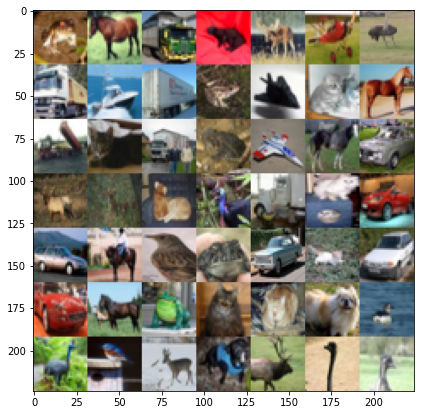

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, :, :]
X_to_plot = np.concatenate([
                    X_to_plot[  : 7, ...].reshape(32*7, 32, 3),
                    X_to_plot[ 7:14, ...].reshape(32*7, 32, 3),
                    X_to_plot[14:21, ...].reshape(32*7, 32, 3),
                    X_to_plot[21:28, ...].reshape(32*7, 32, 3),
                    X_to_plot[28:35, ...].reshape(32*7, 32, 3),
                    X_to_plot[35:42, ...].reshape(32*7, 32, 3),
                    X_to_plot[42:49, ...].reshape(32*7, 32, 3)
                ], axis=1
            )
ax.imshow(X_to_plot)

In [14]:
X_train, X_test = X_train.reshape(50000, 32, 32, 3), X_test.reshape(10000, 32, 32, 3)

In [38]:
model = Sequential()

In [39]:
model.add(Input(shape=[32, 32, 3]))
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 13, 13, 64)       

In [42]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 95s 121ms/step - loss: 1.6362 - accuracy: 0.4002 - val_loss: 1.6491 - val_accuracy: 0.4424
Epoch 2/10
782/782 [==============================] - 94s 120ms/step - loss: 1.1196 - accuracy: 0.6012 - val_loss: 1.1037 - val_accuracy: 0.6073
Epoch 3/10
782/782 [==============================] - 94s 120ms/step - loss: 0.9455 - accuracy: 0.6663 - val_loss: 1.2121 - val_accuracy: 0.5963
Epoch 4/10
782/782 [==============================] - 94s 120ms/step - loss: 0.8320 - accuracy: 0.7073 - val_loss: 1.1947 - val_accuracy: 0.6137
Epoch 5/10
782/782 [==============================] - 103s 132ms/step - loss: 0.7520 - accuracy: 0.7365 - val_loss: 0.9351 - val_accuracy: 0.6816
Epoch 6/10
782/782 [==============================] - 95s 121ms/step - loss: 0.6877 - accuracy: 0.7600 - val_loss: 0.8953 - val_accuracy: 0.6953
Epoch 7/10
782/782 [==============================] - 94s 120ms/step - loss: 0.6440 - accuracy: 0.7753 - val_loss: 1.2418 - val_a

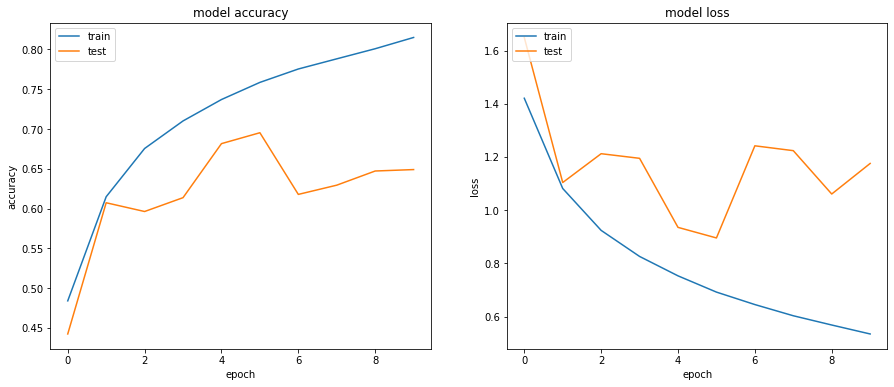

In [48]:
# summarize history for accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(history.history['accuracy']);
ax[0].plot(history.history['val_accuracy']);
ax[0].set_title('model accuracy');
ax[0].set_ylabel('accuracy');
ax[0].set_xlabel('epoch');
ax[0].legend(['train', 'test'], loc='upper left');
# summarize history for loss
ax[1].plot(history.history['loss']);
ax[1].plot(history.history['val_loss']);
ax[1].set_title('model loss');
ax[1].set_ylabel('loss');
ax[1].set_xlabel('epoch');
ax[1].legend(['train', 'test'], loc='upper left');

In [44]:
from sklearn.metrics import roc_curve, auc

In [45]:
y_preds = model.predict(X_test)

In [46]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

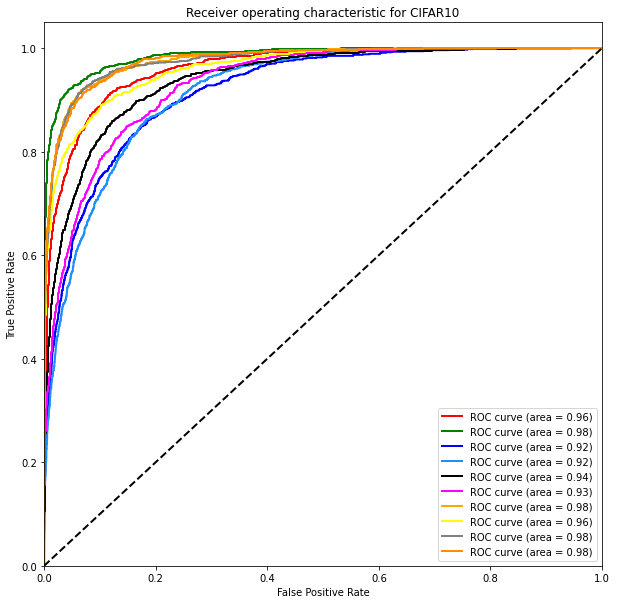

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
lw = 2

colors = [
    "red", "green", "blue", "dodgerblue", "black",
    "magenta", "orange", "yellow", "gray", "darkorange"
]

for i in range(10):
    ax.plot(fpr[i], tpr[i], color=colors[i],
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i]);
ax.plot([0, 1], [0, 1], color="black", lw=lw, linestyle='--');
ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.set_xlabel('False Positive Rate');
ax.set_ylabel('True Positive Rate');
ax.set_title('Receiver operating characteristic for CIFAR10');
ax.legend();